In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from scipy import linalg

In [2]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [3]:
fpath='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
fontsize = 50
font = ImageFont.truetype(fpath, fontsize)

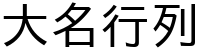

In [4]:
LX = 200
LY = fontsize
img  = Image.new('L', (LX,LY),color=255)
draw = ImageDraw.Draw(img)
draw.text((0,0), "大名行列", fill=0, font=font)
img

In [5]:
data = np.array(img.getdata()).reshape((LY,LX))

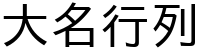

In [6]:
Image.fromarray(np.uint8(data))

In [7]:
np.linalg.matrix_rank(data)

47

In [8]:
u, s, v = linalg.svd(data)

In [9]:
print(f"u: {u.shape}")
print(f"s: {s.shape}")
print(f"v: {v.shape}")

u: (50, 50)
s: (50,)
v: (200, 200)


In [10]:
r = 10
ur = u[:, :r]
ss = np.sqrt(s)
sr = np.matrix(linalg.diagsvd(ss[:r], r,r))
vr = v[:r, :]
A = ur*sr
B = sr*vr

In [11]:
print(f"A: {A.shape}")
print(f"B: {B.shape}")
print(f"AB: {(A*B).shape}")

A: (50, 10)
B: (10, 200)
AB: (50, 200)


In [12]:
np.linalg.matrix_rank(A*B)

10

In [13]:
print((A.size + B.size)/data.size)

0.25


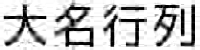

In [14]:
b = np.asarray(A*B)
b = np.clip(b, 0, 255)
Image.fromarray(np.uint8(b))